In [1]:
# Day 1
# Part one
import numpy as np
data = np.loadtxt('day1.txt', dtype=int)
for j in range(2):
    data[:,j] = sorted(data[:,j])
print(np.sum(np.abs(data[:,1] - data[:,0])))

# Part two
from collections import defaultdict
numbers, counts = np.unique(data[:,1], return_counts=True)
look_up_dict = defaultdict(int)
look_up_dict.update({number:count for number, count in zip(numbers, counts)})
print(sum(d*look_up_dict[d] for d in data[:,0]))

1834060
21607792


In [2]:
# Day 2
# Part one
with open('day2.txt', 'r') as fid:
    data = [[int(d) for d in line.split()] for line in fid.read().strip().split('\n')]

import numpy as np
def is_safe(some_list):
    if len(some_list) < 1:
        return True
    current_sign = np.sign(some_list[1] - some_list[0])
    if current_sign == 0:
        return False
    for j in range(1, len(some_list)):
        diff = some_list[j] - some_list[j - 1]
        if np.sign(diff) != current_sign or abs(diff) > 3:
            return False
    return True

print(sum(is_safe(l) for l in data))

#Part two
def is_safe_when_removing_one(some_list):
    if is_safe(some_list) == True:
        return True
    for j in range(len(some_list)):
        test_list = some_list[:j] + some_list[(j + 1):]
        if is_safe(test_list) == True:
            return True
    return False
print(sum(is_safe_when_removing_one(l) for l in data))

359
418


In [3]:
# Day 3
# Part one
with open('day3.txt') as fid:
    data = fid.read().strip()
import re
pattern = r"\(\d{1,3},\d{1,3}\)"
matches = re.findall(r"mul\(\d{1,3},\d{1,3}\)", data)
s = 0
for m in matches:
    left, rght = m[4:-1].split(',')
    s += int(left)*int(rght)
print(s)

# Part two
s = 0
keywords = [r"don't()", r"do()"]
index_keyword = 0
while data:
    index = data.find(keywords[index_keyword])
    index_keyword = (index_keyword + 1) % 2
    substring, data = data[:index], data[(index + 4):]
    if index_keyword == 1:
        matches = re.findall(r"mul\(\d{1,3},\d{1,3}\)", substring)
        for m in matches:
            left, rght = m[4:-1].split(',')
            s += int(left)*int(rght)
    if index == -1:
        break
print(s)
    
    
    

196826776
106780429


In [4]:
# Day 3
# Part one
with open('day4.txt') as fid:
    lines = fid.read().strip().split('\n')


XMAS = [set(), set(), set(), set()]
for row, line in enumerate(lines):
    for col, c in enumerate(line):
        for index, c_test in enumerate('XMAS'):
            if c == c_test:
                XMAS[index].add((row, col))

def is_XMAS_in_direction_from_pos(pos, dir):
    for j in range(1, 4):
        next_pos = (pos[0] + j*dir[0], pos[1] + j*dir[1])
        if next_pos not in XMAS[j]:
            return False
    return True

all_dir = [(row, col) for row in range(-1, 2) for col in range(-1, 2)]
s = 0
for X_pos in XMAS[0]:
    for dir in all_dir:
        s += is_XMAS_in_direction_from_pos(X_pos, dir)
print(s)

# Part two
def is_MAS(A_pos, dir):
    pos1 = (A_pos[0] + dir[0], A_pos[1] + dir[1])
    pos2 = (A_pos[0] - dir[0], A_pos[1] - dir[1])
    if pos1 in XMAS[1] and pos2 in XMAS[3]:
        return True
    if pos1 in XMAS[3] and pos2 in XMAS[1]:
        return True
    return False

print(sum(is_MAS(A_pos, (1, 1)) and is_MAS(A_pos, (1, -1)) for A_pos in XMAS[2]))


2603
1965


In [5]:
# Day 5
# Part one
from collections import defaultdict
with open('day5.txt') as fid:
    rules, updates = fid.read().strip().split('\n\n')
must_not_include = defaultdict(set)
for rule in rules.split('\n'):
    left, rght = rule.split('|')
    must_not_include[int(left)].add(int(rght))

list_of_updates = [[int(pagenum) for pagenum in upd.split(',')] for upd in updates.split('\n')]

def check_update(update):
    for index, page in enumerate(update):
        for prev_page in update[:index]:
            if prev_page in must_not_include[page]:
                return False
    return True
s = 0
for update in list_of_updates:
    if check_update(update):
        s += update[len(update)//2]
print(s)

# Part two
def page_rank(update):
    ranks = [len(update) - 1]*len(update)
    for index1, page1 in enumerate(update):
        for index2, page2 in enumerate(update):
            if index1 == index2:
                continue
            if page2 in must_not_include[page1]:
                ranks[index1] -= 1
    index_middle_after_sorting = ranks.index(len(update)//2)
    return update[index_middle_after_sorting]

s = 0
for update in list_of_updates:
    if not check_update(update):
        s += page_rank(update)
print(s)

5108
7380


In [6]:
# Day 6
# Part one
obstacles = set()
with open('day6.txt','r') as fid:
    lines = fid.read().strip().split('\n')
    Ncol, Nrow = len(lines[0]), len(lines)
    for row, line in enumerate(lines):
        for col, c in enumerate(line):
            if c == '^':
                guardpos_data = (row, col)
            elif c == '#':
                obstacles.add((row, col))

directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]

dir_index = 0
guardpos = guardpos_data
visited = {guardpos}
while True:
    nextpos = (guardpos[0] + directions[dir_index][0], guardpos[1] + directions[dir_index][1])
    if not (0 <= nextpos[0] < Nrow and 0 <= nextpos[1] < Ncol):
        break
    if nextpos in obstacles:
        dir_index = (dir_index + 1) % 4
        continue
    guardpos = nextpos
    visited.add(guardpos)
print(len(visited))

# Part two
def loop_detect(new_obstacle):
    new_obstacles = {o for o in obstacles}
    new_obstacles.add(new_obstacle)
    dir_index = 0
    guardpos = guardpos_data
    exclude = {(guardpos[0], guardpos[1], dir_index)}
    while True:
        nextpos = (guardpos[0] + directions[dir_index][0], guardpos[1] + directions[dir_index][1])
        if not (0 <= nextpos[0] < Nrow and 0 <= nextpos[1] < Ncol):
            return False
        if nextpos in new_obstacles:
            dir_index = (dir_index + 1) % 4
            continue
        guardpos = nextpos
        elem = (guardpos[0], guardpos[1], dir_index)
        if elem in exclude:
            # Loop detected!
            return True
        else:
            exclude.add(elem)

s = sum(loop_detect(v) for v in visited)
print(s)

5269
1957


In [7]:
# Day 7
# Part one
from collections import deque
with open('day7.txt','r') as fid:
    lines = fid.read().strip().split('\n')
data = []
for line in lines:
    res, q = line.split(':')
    data.append((int(res), deque([int(v) for v in q.strip().split()])))
def evaluate(result, current, remaining):
    if current > result:
        return 0
    if len(remaining) == 0:
        if current == result:
            return 1
        else:
            return 0
    rhs = remaining.popleft()
    plusval = evaluate(result, current + rhs, remaining.copy())
    prodval = evaluate(result, current * rhs, remaining.copy())
    return plusval + prodval

s = 0
for result, ops in data:
    tmp = ops.copy()
    lhs = tmp.popleft()
    n = evaluate(result, lhs, tmp)
    if n > 0:
        s += result
print(s)

# Part two
def evaluate(result, current, remaining):
    if current > result:
        return 0
    if len(remaining) == 0:
        if current == result:
            return 1
        else:
            return 0
    rhs = remaining.popleft()
    plusval = evaluate(result, current + rhs, remaining.copy())
    prodval = evaluate(result, current * rhs, remaining.copy())
    concval = evaluate(result, int(str(current) + str(rhs)), remaining.copy())
    return plusval + prodval + concval

s = 0
for result, ops in data:
    tmp = ops.copy()
    lhs = tmp.popleft()
    n = evaluate(result, lhs, tmp)
    if n > 0:
        s += result
print(s)

4555081946288
227921760109726


In [8]:
# Day 8
# Part one
from collections import defaultdict
antenna_positions = defaultdict(list)
with open('day8.txt', 'r') as fid:
    lines = fid.read().strip().split('\n')
    Ncol, Nrow = len(lines[0]), len(lines)
    for row, line in enumerate(lines):
        for col, c in enumerate(line):
            if c != '.' and c != '#':
                antenna_positions[c].append((row, col))

def get_antinode_positions(ant_list):
    for index, l1 in enumerate(ant_list):
        for index2 in range(index + 1, len(ant_list)):
            l2 = ant_list[index2]
            dif = (l2[0] - l1[0], l2[1] - l1[1])
            pos1 = (l1[0] - dif[0], l1[1] - dif[1])
            pos2 = (l2[0] + dif[0], l2[1] + dif[1])
            for pos in [pos1, pos2]:
                if 0 <= pos[0] < Nrow and 0 <= pos[1] < Ncol:
                    antinode_positions.add(pos)

antinode_positions = set()
for antid, antennas in antenna_positions.items():
    get_antinode_positions(antennas)
print(len(antinode_positions))

def get_antinode_positions(ant_list):
    for index, l1 in enumerate(ant_list):
        for index2 in range(index + 1, len(ant_list)):
            l2 = ant_list[index2]
            dif = (l2[0] - l1[0], l2[1] - l1[1])
            index = 0
            while True:
                pos1 = (l1[0] - index*dif[0], l1[1] - index*dif[1])
                if 0 <= pos1[0] < Nrow and 0 <= pos1[1] < Ncol:
                    antinode_positions.add(pos1)
                else:
                    break
                index += 1
            index = 0
            while True:
                pos2 = (l2[0] + index*dif[0], l2[1] + index*dif[1])
                if 0 <= pos2[0] < Nrow and 0 <= pos2[1] < Ncol:
                    antinode_positions.add(pos2)
                else:
                    break
                index += 1

antinode_positions = set()
for antid, antennas in antenna_positions.items():
    get_antinode_positions(antennas)
print(len(antinode_positions))

400
1280


In [9]:
# Day 9
# Part one

with open('day9.txt', 'r') as fid:
    data = fid.read().strip()

backdatapointer = len(data) - 1
backdatapointer -= (backdatapointer % 2)
datapointer = 0
intdata = list(map(int, data))
N_data_sectors = sum(intdata[0::2])
s = 0
for sector in range(N_data_sectors):
    while intdata[datapointer] == 0:
        datapointer += 1
    if datapointer % 2:
        # Uneven
        j = 0
        while intdata[backdatapointer] == 0:
            backdatapointer -= 2
        fileID = backdatapointer // 2
        intdata[backdatapointer] -= 1
    else:
        # Even:
        fileID = datapointer // 2
    s += sector*fileID
    intdata[datapointer] -= 1
print(s)

# Part two
intdata = list(map(int, data))
sector_pos = 0
freespace = []
dataspace = []
for index, sector_length in enumerate(intdata):
    if index % 2:
        # Uneven, freespace:
        freespace.append((sector_pos, sector_length))
    else:
        # Even, dataspace:
        dataspace.append((sector_pos, sector_length, index // 2))
    sector_pos += sector_length

for j in range(len(dataspace) - 1, -1, -1):
    file_pos, file_length, file_ID = dataspace[j]
    for freespace_ID in range(len(freespace)):
        free_pos, free_length = freespace[freespace_ID]
        if file_pos < free_pos:
            break
        if file_length <= free_length:
            dataspace[j] = (free_pos, file_length, file_ID)
            freespace[freespace_ID] = (free_pos + file_length, free_length - file_length)
            break

s = sum(file_ID*L*(pos + (pos + L - 1))//2 for pos, L, file_ID in dataspace)
print(s)

6366665108136
6398065450842


In [10]:
# Day 10
# Part one

allpos = [set() for j in range(10)]
with open('day10.txt', 'r') as fid:
    lines = fid.read().strip().split('\n')
    Ncol, Nrow = len(lines[0]), len(lines)
    for row, line in enumerate(lines):
        for col, num in enumerate(map(int, line)):
            allpos[num].add((row, col))


def explore(current_pos, last_value):
    if current_pos not in allpos[last_value + 1]:
        return set()
    current_value = last_value + 1
    if current_value == 9:
        # Summit reached!
        return {current_pos}
    summit_pos = set()
    for dir in [(-1, 0), (1, 0), (0, 1), (0, -1)]:
        new_pos = (current_pos[0] + dir[0], current_pos[1] + dir[1])
        summit_pos |= explore(new_pos, current_value)
    return summit_pos

s = 0
for startpos in allpos[0]:
    all_reachable_summits = explore(startpos, -1)
    s += len(all_reachable_summits)
print(s)

# Part two
def explore2(current_pos, last_value):
    if current_pos not in allpos[last_value + 1]:
        return 0
    current_value = last_value + 1
    if current_value == 9:
        # Summit reached!
        return 1
    n_trails = 0
    for dir in [(-1, 0), (1, 0), (0, 1), (0, -1)]:
        new_pos = (current_pos[0] + dir[0], current_pos[1] + dir[1])
        n_trails += explore2(new_pos, current_value)
    return n_trails

s = 0
for startpos in allpos[0]:
    s += explore2(startpos, -1)
print(s)

811
1794


In [11]:
# Day 11
# Part one

with open('day11.txt', 'r') as fid:
    stones = list(map(int, fid.read().strip().split()))

cache_dict = {}

def find_number_of_stones(num, level, maxlevel):
    if level == maxlevel:
        return 1
    key = (num, level, maxlevel)
    if key in cache_dict:
        return cache_dict[key]
    
    level += 1
    if num == 0:
        res = find_number_of_stones(1, level, maxlevel)
        cache_dict[key] = res
        return res
    n = len(str(num))
    if n % 2:
        res = find_number_of_stones(2024 * num, level, maxlevel)
        cache_dict[key] = res
        return res
    else:
        N = 10**(n//2)
        int1 = num//N
        int2 = num % N
        res = (find_number_of_stones(int1, level, maxlevel) + 
               find_number_of_stones(int2, level, maxlevel))
        cache_dict[key] = res
        return res

print(sum(find_number_of_stones(intj, 0, 25) for intj in stones))

# Part two
print(sum(find_number_of_stones(intj, 0, 75) for intj in stones))

199946
237994815702032


In [12]:
# Day 12
# Part one
allcrops = {}
with open('day12.txt', 'r') as fid:
    lines = fid.read().strip().split('\n')
    Ncol, Nrow = len(lines[0]), len(lines)
    for row, line in enumerate(lines):
        for col, crop in enumerate(line):
            allcrops[(row, col)] = crop

def get_field_at_pos(pos):
    crop = allcrops[pos]
    visited = set()
    to_explore = [pos]
    while len(to_explore) > 0:
        pos = to_explore.pop()
        visited.add(pos)
        for dir in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            newpos = (pos[0] + dir[0], pos[1] + dir[1])
            if newpos in visited or newpos not in allcrops or allcrops[newpos] != crop:
                continue
            to_explore.append(newpos)
    return visited

allkeys = set(allcrops.keys())
fields = []
while len(allkeys):
    pos = allkeys.pop()
    f = get_field_at_pos(pos)
    allkeys -= f
    fields.append(f)

def get_border_count(pos):
    count = 0
    crop = allcrops[pos]
    for dir in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        newpos = (pos[0] + dir[0], pos[1] + dir[1])
        if newpos not in allcrops or allcrops[newpos] != crop:
            count += 1
    return count

s = 0
for field in fields:
    s += len(field)*sum(get_border_count(pos) for pos in field)
print(s)

# Part two
def get_corner_count(pos):
    count = 0
    crop = allcrops[pos]
    dirs = [(1, 0), (0, -1), (-1, 0), (0, 1)]
    for index, dir1 in enumerate(dirs):
        dir2 = dirs[index - 1]
        p1 = (pos[0] + dir1[0], pos[1] + dir1[1])
        p2 = (pos[0] + dir2[0], pos[1] + dir2[1])
        if ((p1 not in allcrops or allcrops[p1] != crop) and
            (p2 not in allcrops or allcrops[p2] != crop)):
            count += 1
            #print(f'Corner at {pos}')
        px = (pos[0] + dir1[0] + dir2[0], pos[1] + dir1[1] + dir2[1])
        if ((p1 not in allcrops or allcrops[p1] == crop) and
            (p2 not in allcrops or allcrops[p2] == crop) and
            (px in allcrops and allcrops[px] != crop)):
            count += 1
            #print(f'Inner corner at {pos}')
    return count

s = 0
for field in fields:
    s += len(field)*sum(get_corner_count(pos) for pos in field)
print(s)

1488414
911750


In [13]:
# Day 13
# Part one
with open('day13.txt', 'r') as fid:
    configs = fid.read().strip().split('\n\n')

def get_XY_from_button(button):
    tmp = button.strip().split()
    return int(tmp[2][1:-1]), int(tmp[3][1:])

def get_XY_from_prize(button):
    tmp = button.strip().split()
    return int(tmp[1][2:-1]), int(tmp[2][2:])

all_games = []
for config in configs:
    A, B, P = config.split('\n')
    all_games.append([get_XY_from_button(A), get_XY_from_button(B), get_XY_from_prize(P)])

def get_cost_from_game(game, maxpress=100):
    (x1, y1), (x2, y2), (xg, yg) = game
    m, rem1 = divmod(x1*yg - xg*y1, x1*y2 - x2*y1)
    n, rem2 = divmod(xg - m*x2, x1)
    if rem1 == 0 and rem2 == 0 and 0 <= m <= maxpress and 0 <= n <= maxpress:
        return 3*n + m
    else:
        return 0

print(sum(get_cost_from_game(game) for game in all_games))

# Part two
def get_cost_from_game2(game):
    (x1, y1), (x2, y2), (xg, yg) = game
    mult = 10_000_000_000_000
    xg += mult
    yg += mult
    m, rem1 = divmod(x1*yg - xg*y1, x1*y2 - x2*y1)
    n, rem2 = divmod(xg - m*x2, x1)
    if rem1 == 0 and rem2 == 0 and 0 <= m and 0 <= n:
        return 3*n + m
    else:
        return 0

print(sum(get_cost_from_game2(game) for game in all_games))

28262
101406661266314


211773366
7344


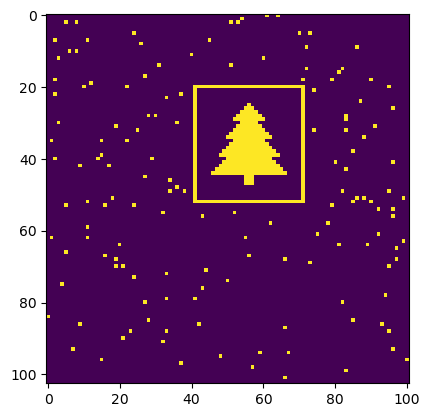

In [149]:
# Day 14
# Part one
data = []
with open('day14.txt') as fid:
    for line in fid.read().strip().split('\n'):
        tmp1, tmp2 = line.split()
        data.append(tuple(map(int, tmp1[2:].split(',') + tmp2[2:].split(','))))

def pos_after_time(posvel, time, Lx=101, Ly=103):
    x, y, vx, vy = posvel
    x += vx*time
    y += vy*time
    return x % Lx, y % Ly

quadrants = [[0, 0], [0,0]]
Lx, Ly = 101, 103
cx, cy = Lx//2, Ly//2
for d in data:
    pos = pos_after_time(d, 100, Lx, Ly)
    if pos[0] == cx or pos[1] == cy:
        continue
    quadrants[pos[1] > cy][pos[0] > cx] += 1
print(quadrants[0][0]*quadrants[0][1]*quadrants[1][0]*quadrants[1][1])

# Part two
import matplotlib.pyplot as plt
def print_picture(allpos, Lx, Ly):
    Z = np.zeros((Ly, Lx))
    for pos in allpos:
        Z[pos[1], pos[0]] += 1
    plt.figure()
    return plt.imshow(Z)

def compute_connected(pos, visited, allpos):
    visited.add(pos)
    for dx in range(-1, 2):
        for dy in range(-1, 2):
            adj_pos = (pos[0] + dx, pos[1] + dy)
            #print(f'{adj_pos=}, {pos=}, {adj_pos in allpos}, {adj_pos not in visited}')
            if adj_pos in allpos and adj_pos not in visited:
                #print('???')
                compute_connected(adj_pos, visited, allpos)
    return visited        
                
def compute_correlation(pos_set_input):
    pos_set = pos_set_input.copy()
    output = []
    #print(pos_set)
    while pos_set:
        pos = pos_set.pop()
        con = compute_connected(pos, set(), pos_set)
        #print(f'{pos=}, {con=}')
        pos_set -= con
        output.append(len(con))
    return output

E = []
for t in range(10403):
    allpos = {pos_after_time(d, t, Lx, Ly) for d in data}
    E.append((len(compute_correlation(allpos)), t))

t_tree = min(E)[1]
print(t_tree)
all_pos = {pos_after_time(d, t_tree, Lx, Ly) for d in data}
print_picture(all_pos, Lx, Ly)
plt.savef

(144, 7344)


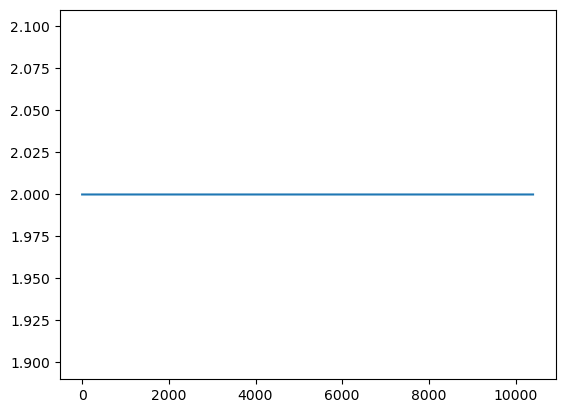

In [144]:
def compute_connected(pos, visited, allpos):
    visited.add(pos)
    for dx in range(-1, 2):
        for dy in range(-1, 2):
            adj_pos = (pos[0] + dx, pos[1] + dy)
            #print(f'{adj_pos=}, {pos=}, {adj_pos in allpos}, {adj_pos not in visited}')
            if adj_pos in allpos and adj_pos not in visited:
                #print('???')
                compute_connected(adj_pos, visited, allpos)
    return visited        
                
def compute_correlation(pos_set_input):
    pos_set = pos_set_input.copy()
    output = []
    #print(pos_set)
    while pos_set:
        pos = pos_set.pop()
        con = compute_connected(pos, set(), pos_set)
        #print(f'{pos=}, {con=}')
        pos_set -= con
        output.append(len(con))
    return output

E = []
for t in range(10403):
    allpos = {pos_after_time(d, t, Lx, Ly) for d in data}
    E.append((len(compute_correlation(allpos)), t))

print(min(E))


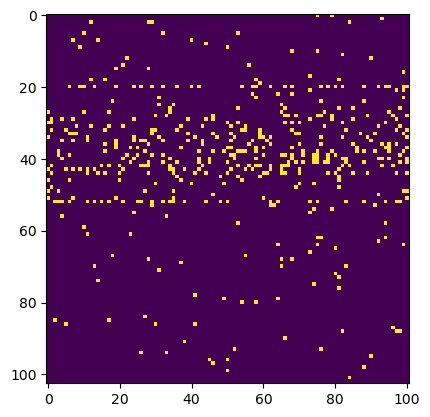

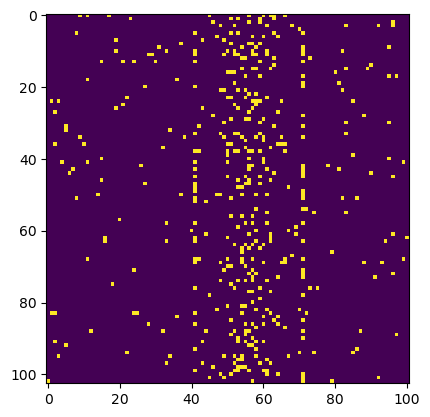

In [91]:
import matplotlib.pyplot as plt
def print_picture2(allpos, Lx, Ly):
    Z = np.zeros((Ly, Lx))
    for pos in allpos:
        Z[pos[1], pos[0]] += 1
    plt.figure()
    return plt.imshow(Z)

for t in range(10403):
    left_pos = set()
    rght_pos = set()
    cntr_pos = set()
    for d in data:
        pos = pos_after_time(d, t, Lx, Ly)
        if pos[0] < cx:
            left_pos.add(pos)
        elif pos[0] > cx:
            rght_pos.add(pos)
        else:
            cntr_pos.add(pos)
    if abs(len(left_pos) - len(rght_pos)) < 180:
        is_symmetric = 180
        for l in left_pos:
            sympos = (Lx - l[0] - 1, l[1])
            if sympos not in rght_pos:
                is_symmetric -= 1
        if is_symmetric > 0:
            print_picture2(left_pos | rght_pos | cntr_pos, Lx, Ly)


In [80]:
from collections import defaultdict
import math
reclab = {}
for d in data:
    tmp = {}
    for t in range(1, 1000000):
        pos = pos_after_time(d, t, Lx, Ly)
        if pos in tmp:
            break
        tmp[pos] = t
    reclab[d] = tmp

times = []
for d, r in reclab.items():
    #print(len(r), r[(cx, cy)])
    times.append(r[(d[0], d[1])])

math.gcd(34, 56)
math.lcm(*[10, 3])
math.lcm(*times)
print(times)


        #print_picture2(left_pos | rght_pos | cntr_pos, Lx, Ly)

[10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403

[229, 124, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


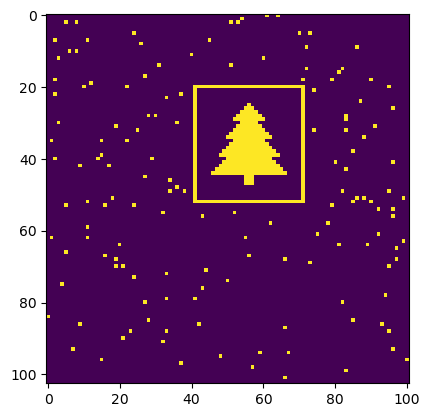

In [141]:

def compute_connected(pos, visited, allpos):
    visited.add(pos)
    for dx in range(-1, 2):
        for dy in range(-1, 2):
            adj_pos = (pos[0] + dx, pos[1] + dy)
            #print(f'{adj_pos=}, {pos=}, {adj_pos in allpos}, {adj_pos not in visited}')
            if adj_pos in allpos and adj_pos not in visited:
                #print('???')
                compute_connected(adj_pos, visited, allpos)
    return visited        
                
def compute_correlation(pos_set_input):
    pos_set = pos_set_input.copy()
    output = []
    #print(pos_set)
    while pos_set:
        pos = pos_set.pop()
        con = compute_connected(pos, set(), pos_set)
        #print(f'{pos=}, {con=}')
        pos_set -= con
        output.append(len(con))
    return output

t = 7344
allpos = {pos_after_time(d, t, Lx, Ly) for d in data}

cc = compute_correlation(allpos)
print(cc)

print_picture2(allpos, Lx, Ly)
#print((59, 40) in allpos)
#test = compute_connected((59, 40), set(), allpos)
#print(test)
#print(allpos)
#print((58, 40) in allpos)

In [98]:
a = {1, 3, 4}
a.remove(

1